In [24]:
#importing dependencies
import pandas as pd
import matplotlib.pyplot as plt

In [81]:
#importing the data
# use forward slashes to avoid Python treating backslashes as escape sequences
totalWind = pd.read_csv("C:/Users/stian/OneDrive/Dokumenter/Fall2025/Energy/Data/ninjaTotalWind.csv")

C:\Users\stian\AppData\Local\Temp\ipykernel_1080\1209043798.py:3: DtypeWarning: Columns (1,2,3,4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  totalWind = pd.read_csv("C:/Users/stian/OneDrive/Dokumenter/Fall2025/Energy/Data/ninjaTotalWind.csv")


In [82]:
#cleaning the columns
totalWind.drop([0,1,2], inplace = True)
totalWind.columns = ['time', 'national', 'DK01', 'DK02', 'DK03', 'DK04', 'DK05']
#we want time as datetime object 
totalWind['time'] = pd.to_datetime(totalWind['time'])
totalWind['national'] = pd.to_numeric(totalWind['national'])

In [83]:
totalWind

,time,national,DK01,DK02,DK03,DK04,DK05
3,1980-01-01 00:00:00+00:00,0.122876,0.173497,0.226407,0.045095,0.103339,0.120442
4,1980-01-01 01:00:00+00:00,0.119717,0.164914,0.224374,0.04903,0.097163,0.112279
5,1980-01-01 02:00:00+00:00,0.117189,0.154415,0.220325,0.058575,0.090558,0.103703
6,1980-01-01 03:00:00+00:00,0.113040,0.143466,0.216748,0.069945,0.078771,0.092318
7,1980-01-01 04:00:00+00:00,0.106618,0.131167,0.214374,0.077951,0.062065,0.080078
...,...,...,...,...,...,...,...
394486,2024-12-31 19:00:00+00:00,0.886081,0.745368,0.858423,0.916075,0.901096,0.870305
394487,2024-12-31 20:00:00+00:00,0.892645,0.771123,0.882582,0.924209,0.899937,0.863677
394488,2024-12-31 21:00:00+00:00,0.896686,0.81028,0.901164,0.928739,0.897901,0.855458
394489,2024-12-31 22:00:00+00:00,0.901577,0.838301,0.912978,0.933,0.900396,0.854166


Mean capacity factor 1980-2024: 0.30620624681866115
Min Capacity factor: 0.000109, max capacity factor 0.970996


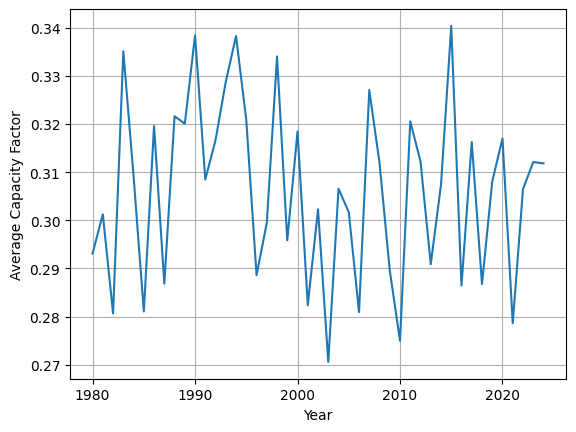

In [88]:
meanCapFac = totalWind['national'].mean()
maxCapFac = totalWind['national'].max()
minCapFac = totalWind['national'].min()

print(f'Mean capacity factor 1980-2024: {meanCapFac}')
print(f'Min Capacity factor: {minCapFac}, max capacity factor {maxCapFac}')
#df.groupby(df.your_date_column.dt.month)['values_column'].sum()
year_avg = totalWind.groupby(totalWind.time.dt.year)['national'].mean().reset_index()
plt.plot(year_avg['time'], year_avg['national'])
plt.grid()
plt.xlabel('Year')
plt.ylabel('Average Capacity Factor')
plt.show()

In [89]:
highs = year_avg.sort_values('national', ascending=False).head(3)
lows = year_avg.sort_values('national', ascending=False).tail(3)

print('Years with high capacity factor\n\n', highs,'\n\n')
print('Years with low Capacity factors\n\n', lows)

Years with high capacity factor

     time  national
35  2015  0.340395
10  1990  0.338431
14  1994  0.338293 


Years with low Capacity factors

     time  national
41  2021  0.278576
30  2010  0.274948
23  2003  0.270565


The above plot shows average capacity factor per year. The goal is to find years of high production and years of low production to obtain different scenarios we can use as data source.

# PV

In [85]:
pv = pd.read_csv("C:/Users/stian/OneDrive/Dokumenter/Fall2025/Energy/Data/ninjaPV.csv")
pv

C:\Users\stian\AppData\Local\Temp\ipykernel_1080\154343626.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  pv = pd.read_csv("C:/Users/stian/OneDrive/Dokumenter/Fall2025/Energy/Data/ninjaPV.csv")


,"# Renewables.ninja pv (country zones, hourly, 1980 - 2024) - DK - ninja-pv-countryzones-DK-hourly-merra2.csv.gz - Version: 1.4 - License: https://creativecommons.org/licenses/by-nc/4.0/ - Reference: https://doi.org/10.1016/j.energy.2016.08.060",Unnamed: 1
0,"# Units: time in UTC, other columns are bias-c...",NaN
1,"# {'units': {'time': 'UTC', 'NATIONAL': 'bias-...",NaN
2,time,NATIONAL
3,1980-01-01 00:00:00+00:00,0.000000
4,1980-01-01 01:00:00+00:00,0.000000
...,...,...
394486,2024-12-31 19:00:00+00:00,0.0
394487,2024-12-31 20:00:00+00:00,0.0
394488,2024-12-31 21:00:00+00:00,0.0
394489,2024-12-31 22:00:00+00:00,0.0


In [86]:
#cleaning the columns
pv.drop([0,1,2], inplace = True)
pv.columns = ['time', 'national']
#we want time as datetime object 
pv['time'] = pd.to_datetime(pv['time'])
pv['national'] = pd.to_numeric(pv['national'])

Mean capacity factor 1980-2024: 0.11332277027438098
Min Capacity factor: 0.0, max capacity factor 0.735


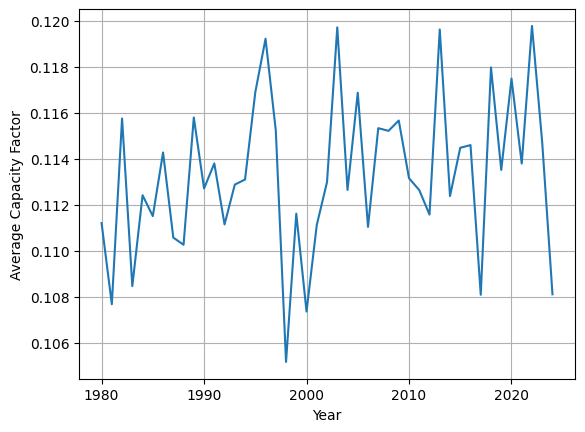

In [90]:
meanCapFac = pv['national'].mean()
maxCapFac = pv['national'].max()
minCapFac = pv['national'].min()

print(f'Mean capacity factor 1980-2024: {meanCapFac}')
print(f'Min Capacity factor: {minCapFac}, max capacity factor {maxCapFac}')
#df.groupby(df.your_date_column.dt.month)['values_column'].sum()
year_avg = pv.groupby(pv.time.dt.year)['national'].mean().reset_index()
plt.plot(year_avg['time'], year_avg['national'])
plt.grid()
plt.xlabel('Year')
plt.ylabel('Average Capacity Factor')
plt.show()

In [91]:
highs = year_avg.sort_values('national', ascending=False).head(3)
lows = year_avg.sort_values('national', ascending=False).tail(3)

print('Years with high capacity factor\n\n', highs,'\n\n')
print('Years with low Capacity factors\n\n', lows)

Years with high capacity factor

     time  national
42  2022  0.119788
23  2003  0.119725
33  2013  0.119633 


Years with low Capacity factors

     time  national
1   1981  0.107670
20  2000  0.107350
18  1998  0.105157
